In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow.keras.preprocessing import text,sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D,GlobalMaxPooling1D,MaxPooling1D
from sklearn.model_selection import train_test_split
import re    #for regex
import string
import re    #for regex
import nltk
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TengkaiGao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Embedding, Conv1D, GlobalMaxPooling1D,SpatialDropout1D,GlobalAveragePooling1D, LSTM, SimpleRNN

In [3]:
train = pd.read_csv('G:/toxic_detector_final.csv',usecols =["comment_text","Toxic"])

In [4]:
clean = {
"aren't" : "are not",
"can't" : "can not",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not",
"tryin'":"trying"
}

In [5]:
def clean_text(text):
    
    text = text.lower()
    text = re.sub(r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', '', text) # clean url
    text = re.sub(r'#(\w+)', '', text)   # clean hashes
    text = re.sub(r'@(\w+)', '', text)   # clean @
    text = re.sub(r'<[^>]+>', '', text)  # clean tags
    text = re.sub(r'\d+', '', text)      # clean digits
    text = [clean[word] if word in clean else word for word in text.split()] 
    
   
    
    return text

In [6]:
train['comment_text_clean'] = train['comment_text'].apply(lambda x: clean_text(x))

In [7]:
x=train["comment_text_clean"]
y=train["Toxic"]

In [8]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=1,shuffle=True)

In [9]:
max_feature = 7000
tokenizer = tf.keras.preprocessing.text.Tokenizer(max_feature,
                                                  lower= True,
                                                  filters= '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                                                  split = " ")

tokenizer.fit_on_texts(train_x)

In [10]:
sequences = tokenizer.texts_to_sequences(train_x)

In [11]:
pad_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences,
                                                             maxlen = 300)

In [12]:
test_x_tokenized=tokenizer.texts_to_sequences(test_x)
x_testing=tf.keras.preprocessing.sequence.pad_sequences(test_x_tokenized,maxlen=300)

In [39]:
model_lstm= tf.keras.Sequential([tf.keras.layers.Embedding(max_feature,32,input_length = 300),  
                                 tf.keras.layers.Dropout(0.2),  
                                 tf.keras.layers.LSTM(32),  
                                 tf.keras.layers.Dropout(0.2),  
                                 tf.keras.layers.Dense(1, activation = "sigmoid")]
                                )

model_lstm.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 300, 32)           224000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 300, 32)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 30)                7560      
_________________________________________________________________
dropout_4 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 31        
Total params: 231,591
Trainable params: 231,591
Non-trainable params: 0
_________________________________________________________________


In [40]:
model_lstm.compile(loss = "binary_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(3e-3),
                 metrics= ["accuracy"])

In [41]:
history = model_lstm.fit(
    pad_sequences,train_y,
    batch_size= 64,
    epochs= 20,
    validation_split= 0.1,
    verbose=1,shuffle=True
)

Epoch 1/20
440/440 [==============================] - 10s 18ms/step - loss: 0.3422 - accuracy: 0.8539 - val_loss: 0.2499 - val_accuracy: 0.9012
Epoch 2/20
440/440 [==============================] - 8s 17ms/step - loss: 0.2238 - accuracy: 0.9135 - val_loss: 0.2476 - val_accuracy: 0.8989
Epoch 3/20
440/440 [==============================] - 8s 17ms/step - loss: 0.1887 - accuracy: 0.9267 - val_loss: 0.2547 - val_accuracy: 0.9024
Epoch 4/20
440/440 [==============================] - 8s 17ms/step - loss: 0.1542 - accuracy: 0.9393 - val_loss: 0.2855 - val_accuracy: 0.8941
Epoch 5/20
440/440 [==============================] - 8s 17ms/step - loss: 0.1368 - accuracy: 0.9463 - val_loss: 0.3259 - val_accuracy: 0.8996
Epoch 6/20
440/440 [==============================] - 8s 17ms/step - loss: 0.1162 - accuracy: 0.9565 - val_loss: 0.3232 - val_accuracy: 0.9044
Epoch 7/20
440/440 [==============================] - 8s 17ms/step - loss: 0.1026 - accuracy: 0.9598 - val_loss: 0.3363 - val_accuracy: 0.892

In [42]:
predictions = (model_lstm.predict(x_testing) > 0.5).astype("int32")
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#Classification report for bag of words 
report=classification_report(test_y,predictions,digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.8700    0.9070    0.8881      3998
           1     0.8979    0.8579    0.8775      3815

    accuracy                         0.8830      7813
   macro avg     0.8840    0.8824    0.8828      7813
weighted avg     0.8836    0.8830    0.8829      7813



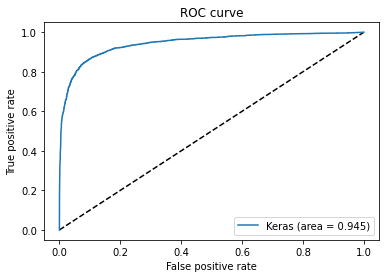

In [43]:
from sklearn.metrics import roc_curve
y_pred_keras =model_lstm.predict(x_testing).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_y, y_pred_keras)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [71]:
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_feature, 32, input_length=300),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile model
model_cnn.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model summary
model_cnn.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 300, 32)           224000    
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 296, 64)           10304     
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 64)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 17        
Total params: 235,361
Trainable params: 235,361
Non-trainable params: 0
_________________________________________________________________


In [72]:
model_cnn.compile(loss = "binary_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(3e-3),
                 metrics= ["accuracy"])

In [73]:
history = model_cnn.fit(
    pad_sequences,train_y,
    batch_size= 64,
    epochs= 20,
    validation_split= 0.1,
    verbose=1,shuffle=True
)

Epoch 1/20
440/440 [==============================] - 5s 8ms/step - loss: 0.3254 - accuracy: 0.8553 - val_loss: 0.2523 - val_accuracy: 0.8948
Epoch 2/20
440/440 [==============================] - 4s 8ms/step - loss: 0.1911 - accuracy: 0.9236 - val_loss: 0.2447 - val_accuracy: 0.9012
Epoch 3/20
440/440 [==============================] - 4s 8ms/step - loss: 0.1204 - accuracy: 0.9540 - val_loss: 0.3066 - val_accuracy: 0.8938
Epoch 4/20
440/440 [==============================] - 3s 8ms/step - loss: 0.0609 - accuracy: 0.9790 - val_loss: 0.3735 - val_accuracy: 0.8922
Epoch 5/20
440/440 [==============================] - 3s 8ms/step - loss: 0.0313 - accuracy: 0.9911 - val_loss: 0.4552 - val_accuracy: 0.8858
Epoch 6/20
440/440 [==============================] - 3s 8ms/step - loss: 0.0190 - accuracy: 0.9952 - val_loss: 0.4753 - val_accuracy: 0.8820
Epoch 7/20
440/440 [==============================] - 4s 9ms/step - loss: 0.0133 - accuracy: 0.9964 - val_loss: 0.5349 - val_accuracy: 0.8887
Epoch 

In [74]:
predictions = (model_cnn.predict(x_testing) > 0.5).astype("int32")
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#Classification report for bag of words 
report=classification_report(test_y,predictions,digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.8679    0.9002    0.8837      3998
           1     0.8912    0.8564    0.8734      3815

    accuracy                         0.8788      7813
   macro avg     0.8795    0.8783    0.8786      7813
weighted avg     0.8792    0.8788    0.8787      7813



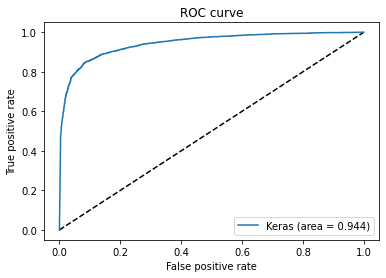

In [75]:
from sklearn.metrics import roc_curve
y_pred_keras =model_cnn.predict(x_testing).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_y, y_pred_keras)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()